## Task 1: KEGG and gene id mapping

Familiarize yourself with the KEGG Rest interface and how to access it with Biopyhton:

http://www.genome.jp/kegg/rest/keggapi.html

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

In [50]:
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
from IPython.display import Image, HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

### Subtask 1.1 Extract gene lists for all (mouse) KEGG pathways and store them in a suitable Python data structure

In [52]:
print(kegg_list('pathway','mmu').read()[1:1000])

ath:mmu00010	Glycolysis / Gluconeogenesis - Mus musculus (mouse)
path:mmu00020	Citrate cycle (TCA cycle) - Mus musculus (mouse)
path:mmu00030	Pentose phosphate pathway - Mus musculus (mouse)
path:mmu00040	Pentose and glucuronate interconversions - Mus musculus (mouse)
path:mmu00051	Fructose and mannose metabolism - Mus musculus (mouse)
path:mmu00052	Galactose metabolism - Mus musculus (mouse)
path:mmu00053	Ascorbate and aldarate metabolism - Mus musculus (mouse)
path:mmu00061	Fatty acid biosynthesis - Mus musculus (mouse)
path:mmu00062	Fatty acid elongation - Mus musculus (mouse)
path:mmu00071	Fatty acid degradation - Mus musculus (mouse)
path:mmu00072	Synthesis and degradation of ketone bodies - Mus musculus (mouse)
path:mmu00100	Steroid biosynthesis - Mus musculus (mouse)
path:mmu00120	Primary bile acid biosynthesis - Mus musculus (mouse)
path:mmu00130	Ubiquinone and other terpenoid-quinone biosynthesis - Mus musculus (mouse)
path:mmu00140	Steroid hormone biosynthesis - Mus musculus


In [53]:
def get_gene_from_pathway_by_parsing(pathway_):
    ''' This function gets the genes for one pathway by parsing the kegg_entry
    
        pathway_: the pathway to get the genes from
    
    '''
    
    # try to parse the kegg entry
    try:
        kegg_entry = kegg_get(pathway_).read().replace("COMPOUND", "GENE").split("GENE")[1].split("\n")
    except:
        return
    
    # lists storing the kegg ids and gene names
    list_of_kegg_ids_ = []
    list_of_gene_names_ = []
    
    # iterate over kegg_entry and skip last element
    for gene_entry in kegg_entry[:-1]:
        
        # add kegg_id and gene_name to lists, if there is one
        try:
            list_of_kegg_ids_.append(gene_entry.split()[0])
            list_of_gene_names_.append(gene_entry.split()[1][:-1])
        except:
            #print("gene entry: " + str(gene_entry))
        
    return(list_of_kegg_ids_, list_of_gene_names_)
    

In [54]:
def get_genes_from_pathways_by_parsing(organism_identifier='mmu'):
    ''' This function gets a list of gene identifiers from the pathways of the given organism.
    
        organism_identifier: the organism to search for
    
    '''
    
    # get a list of all pathways
    pathway_list = kegg_list('pathway','mmu').read().split("\n")

    # list to store the pathways 
    list_of_pathway_genes = []
    
    # path:mmu05416    Viral myocarditis - Mus musculus (mouse)
    # iterate over the pathways
    for pathway_entry in pathway_list[:-1]:
        
        # path:mmu05416
        pw = pathway_entry.split()[0]
        
        # get the gene from the pathway by parsing the kegg string
        genes = get_gene_from_pathway_by_parsing(pw)
        
        # append only if genes is valid
        if not genes is None:
            list_of_pathway_genes.append((pw , genes[0], genes[1]))
        
        
    return list_of_pathway_genes
    

In [55]:
pathways_genes_ids = get_genes_from_pathways_by_parsing()

gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: REFERENCE   
gene entry: REFERENCE   
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: REFERENCE   
gene entry: REFERENCE   
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: REFERENCE   
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: REFERENCE   
gene entry: ///
gene entry: ///
gene entry: REFERENCE   
gene entry: ///
gene entry: ///
gene entry: ///
gene entry:             14968
gene entry: ///
gene entry: ///
gene entry: REFERENCE   
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
gene entry: ///
ge

In [56]:
kegg_list('path:mmu00010').read()

'path:mmu00010\tGlycolysis / Gluconeogenesis - Mus musculus (mouse)\n'

In [57]:
def create_dataframe_from_list(pathway_genes_mmu_):
    ''' This function creates a dataframe from the given list.
    
        pathway_genes_mmu_: the list to create the dataframe from   
    '''
    
    # get the pathway IDs
    pathway_list = [item[0] for item in pathway_genes_mmu_]
    
    # list to store the description
    desc_list = []
    
    # iterate over each pathway
    for a in pathway_list:
        
        # store the description in the list
        desc_list.append(kegg_list(a).read().split("\t")[1])
       
    # get the first entry of the pathway_genes_mmu_ (=pathway IDs)
    pathway_list = [item[0] for item in pathway_genes_mmu_]
    
    # get the second entry of the pathway_genes_mmu_ (=gene IDs)
    gene_list = [item[1] for item in pathway_genes_mmu_]
    
    # get the third entry of the pathway_genes_mmu_ (=gene names)
    gene_name = [item[2] for item in pathway_genes_mmu_]
    
    return pd.DataFrame({"Pathway ID" : pathway_list,
                         "Gene ID" : gene_list,
                         "Gene Name" : gene_name,  
                         "Description": desc_list })

In [58]:
pathways_genes_ids_df = create_dataframe_from_list(pathways_genes_ids)

In [59]:
pathways_genes_ids_df.head()

,Description,Gene ID,Gene Name,Pathway ID
0,Glycolysis / Gluconeogenesis - Mus musculus (m...,"[15277, 212032, 15275, 216019, 103988, 14751, ...","[Hk2, Hk3, Hk1, Hkdc1, Gck, Gpi1, Pfkl, Pfkm, ...",path:mmu00010
1,Citrate cycle (TCA cycle) - Mus musculus (mous...,"[12974, 71832, 104112, 11429, 11428, 15926, 26...","[Cs, Csl, Acly, Aco2, Aco1, Idh1, Idh2, Idh3g,...",path:mmu00020
2,Pentose phosphate pathway - Mus musculus (mous...,"[14751, 14380, 14381, 66171, 100198, 110208, 6...","[Gpi1, G6pd2, G6pdx, Pgls, H6pd, Pgd, Rpe, Tkt...",path:mmu00030
3,Pentose and glucuronate interconversions - Mus...,"[110006, 16591, 22238, 22236, 94284, 94215, 39...","[Gusb, Kl, Ugt2b5, Ugt1a2, Ugt1a6a, Ugt2a1, Ug...",path:mmu00040
4,Fructose and mannose metabolism - Mus musculus...,"[110119, 54128, 29858, 331026, 69080, 218138, ...","[Mpi, Pmm2, Pmm1, Gmppb, Gmppa, Gmds, Tsta3, F...",path:mmu00051


### Subtask 1.2: Save the KEGG gene sets as a gmt file after you made sure they have the proper gene ids with respect to your DE analysis

hints: 

http://biopython.org/wiki/Annotate_Entrez_Gene_IDs

http://www.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats

In [60]:
def write_gmt_file(dataframe_to_write, filename_):
    ''' This function writes the dataframe_to_write as .gmt file.
        
        dataframe_to_write: the dataframe to write
        filename_: the filename to write to 
    
    '''

    # gmt file:
    # 1 line = 1 pathway
    # name \t descp \t gene1 \t gene2 \t gene3 etc

    # open filename_
    with open(filename_, "w") as gmt_file:
        
        # iterate over dataframe
        for index, row in dataframe_to_write.iterrows():
            
            # get the genes to write
            genes_to_write = row['Gene Name']
            
            # genes_to_write is a list -> convert it to string
            genes_to_write_str = ",".join(genes_to_write)
            
            # desc_to_write_str is a list -> convert it to string
            desc_to_write_str = "".join(row['Description'])
            
            # replace new line
            desc_to_write_str = desc_to_write_str.replace("\n","")
            
            # genes are ","-separated, but need to be "\t"-separated
            genes_to_write_str = genes_to_write_str.replace(",", "\t")
            
            # create the string to write
            string_to_write = row['Pathway ID'] + "\t" + desc_to_write_str + "\t" + genes_to_write_str + "\n"

            # write string to file
            gmt_file.write(string_to_write)
            
    print("File " + filename_ + " has been succesfully written.")        

In [61]:
write_gmt_file(pathways_genes_ids_df, "results\kegg_mmu_pathway_genes.gmt")

File results\kegg_mmu_pathway_genes.gmt has been succesfully written.


## Task 2: Gene Set Enrichment

### Subtask 2.1: Read in the csv file you produced during the Differential Expression module, extract a gene list (as a python list of gene symbols) from your favorite multiple correction column (and store it in a variable)

In [62]:
fold_change_df = pd.read_csv("results/diff_expr_genes_fold_change.csv")

In [63]:
fold_change_df.head()

,gene,pvalue,sidak,holm-sidak,holm,simes-hochberg,hommel,fdr_bh,fdr_by,fdr_tsbh,fdr_tsbky,log2 fold change
0,39872,6.265481e-11,0.000001,0.000001,0.000001,0.000001,0.000001,2.388628e-09,2.524413e-08,1.055814e-09,1.121471e-09,-0.065622
1,39873,6.018315e-04,0.999998,0.999883,1.000000,0.500000,0.500000,1.932383e-03,2.042232e-02,8.541462e-04,9.072615e-04,-0.015217
2,39874,3.164228e-02,1.000000,1.000000,1.000000,0.500000,0.500000,5.533046e-02,5.847579e-01,2.445701e-02,2.597787e-02,0.010690
3,39875,1.384384e-01,1.000000,1.000000,1.000000,0.500000,0.500000,1.868879e-01,1.000000e+00,8.260765e-02,8.774463e-02,-0.008591
4,39876,3.676499e-05,0.551901,0.469274,0.633498,0.500000,0.343017,1.739348e-04,1.838224e-03,7.688215e-05,8.166309e-05,0.020228


In [64]:
fold_change_genes = fold_change_df['gene']

In [65]:
fold_change_genes.head()

0    39872
1    39873
2    39874
3    39875
4    39876
Name: gene, dtype: object

### Subtask 2.2: Perform gene set enrichment (Fisher's exact test or an hypergeometric test will do for our purposes) with the KEGG gene sets you extracted in Task 1 (you may want to store the results in a pandas dataframe and write them to csv)

hint:

https://genetrail2.bioinf.uni-sb.de/help?topic=set_level_statistics

In [66]:
# get all genes stored in the pathways_genes_ids_df and store them in set
set_pathway_genes = set([i for sublist in pathways_genes_ids_df['Gene Name'] for i in sublist])

# get all genes stored in the fold_change_genes dataframe and store them in set
set_fold_change_genes = set(fold_change_genes)

# all genes in both sets
in_both_sets = set_pathway_genes & set_fold_change_genes


print("There are " + str(len(in_both_sets)) + " genes in both sets.")

There are 7112 genes in both sets.


In [67]:
def intersect_dataframes(df_pathway_1, df_fold_change_2):
    ''' Intersects two dataframes and returns the list of genes in both dataframes.
    
        df_pathway_1: the dataframe containing the pathways
        df_fold_change_2: the dataframe containing the fold changes
    '''

    # get all genes stored in the pathways_genes_ids_df and store them in set
    try:
        set_df1 = set([i for i in df_pathway_1[2]])
    except:
        set_df1 = set([i for sublist in df_pathway_1['Gene Name'] for i in sublist])
    
    # get all genes stored in the fold_change_genes dataframe and store them in set
    set_df2 = set(df_fold_change_2)
    
    # all genes in both sets
    return set_df1 & set_df2

In [68]:
pathways_genes_ids_df_pw_index = pathways_genes_ids_df.set_index('Pathway ID')

In [69]:
pathways_genes_ids_df_pw_index.loc['path:mmu00010']

Description    Glycolysis / Gluconeogenesis - Mus musculus (m...
Gene ID        [15277, 212032, 15275, 216019, 103988, 14751, ...
Gene Name      [Hk2, Hk3, Hk1, Hkdc1, Gck, Gpi1, Pfkl, Pfkm, ...
Name: path:mmu00010, dtype: object

In [70]:
# get rid of all genes which are not existing in the pathway
intersection_pathway_fold_change = intersect_dataframes(pathways_genes_ids_df, set_fold_change_genes)

In [71]:
from scipy.stats import hypergeom

In [72]:
def perform_gene_set_enrichment(fold_change_df_, pathway_genes_df_):
    ''' This function performs a gene set enrichment on a sinle pathway.
    
    '''

    # differentially expressed genes 
    D = fold_change_df_[fold_change_df_['holm-sidak'] < 0.05].index  
    
    # pathway genes
    P = pathway_genes_df_['Gene Name']
    
    # not differentially expressed genes
    G = fold_change_df_[fold_change_df_['holm-sidak'] > 0.05].index

    # D united with P
    D_and_P = len(intersect_dataframes(pathway_genes_df_, D))
    
    # D united with not P
    D_and_not_P = len(D)-D_and_P
    
    # not D united with P
    not_D_and_P = len(intersect_dataframes(pathway_genes_df_, G))
    
    # not D united with not P
    not_D_and_not_P = len(G)-not_D_and_P
    
    # create the contingency table
    table = pd.DataFrame({'Diff. expr.' : pd.Series([D_and_P, D_and_not_P, D_and_P+D_and_not_P], 
                                                   index=['in PW', 'Not in PW', 'Total']),
                         'Not Diff. expr.' : pd.Series([not_D_and_P, not_D_and_not_P, not_D_and_P+not_D_and_not_P], 
                                                index=['in PW', 'Not in PW', 'Total']),
                         'Total' : pd.Series([D_and_P+not_D_and_P, D_and_not_P+not_D_and_not_P, 
                                              D_and_P+D_and_not_P+not_D_and_P+not_D_and_not_P], 
                                             index=['in PW', 'Not in PW', 'Total'])})
    
    # # genes differentially expressed
    n = len(D)
    
    # number of genes diff. expr. AND in pathway
    k = D_and_P
    
    # total number of genes 
    m = D_and_P+D_and_not_P+not_D_and_P+not_D_and_not_P
    
    # number of genes in pathway
    l = D_and_P+not_D_and_P
    
    # compute p-value:
    k_ = l*n/m
    if k_ >= k:
        p_value = hypergeom.cdf(k,m,l,n)
    else:
        p_value = hypergeom.sf(k-1,m,l,n)
    
    
    return p_value

In [73]:
def perform_gene_set_enrichment_all_pathways(fold_change_df_, _pathway_genes_df_):
    ''' This function performs a gene set enrichment on all pathways stored in the _pathway_genes_df_ Dataframe.
    
        fold_change_df_: the dataframe containing the differential expression data
        _pathway_genes_df_: the dataframe containing the pathways and their corresponding genes
    '''
    
    # lists to create the dataframe
    list_of_pathways = []
    list_of_p_values = []
    
    # iterate over all pathways
    for pw_name, pathway in _pathway_genes_df_.iterrows():
        
        # append the pathway id
        list_of_pathways.append(pw_name)
        
        # compute the p-value for the given pathway
        list_of_p_values.append(perform_gene_set_enrichment(fold_change_df_, pathway))
    
    return pd.DataFrame({'Pathway' : list_of_pathways, 
                         'p-value' : list_of_p_values}) 

In [74]:
# set 'gene' as index for the fold change dataframe
fc_df_gene_index = fold_change_df.set_index('gene')

# get only the entries which are existent in the pathway dataframe
fold_change_filtered = fc_df_gene_index.loc[list(intersection_pathway_fold_change)]

# perform gene set enrichment on one pathway
perform_gene_set_enrichment(fold_change_filtered, pathways_genes_ids_df_pw_index.loc['path:mmu05414'])

0.18182861556701285

In [75]:
# perform gene set enrichment on all pathways
gene_set_enrichment_p_values = perform_gene_set_enrichment_all_pathways(fold_change_filtered, pathways_genes_ids_df_pw_index)

In [76]:
# get the number of enriched genes
len(gene_set_enrichment_p_values)

294

### Subtask 2.3: Extract a list of significantly (at 0.05 significance) enriched KEGG pathways

In [77]:
gene_set_enrichment_p_values[gene_set_enrichment_p_values['p-value'] < 0.05].sort_values(by='p-value').head()

,Pathway,p-value
189,path:mmu04740,2.607093e-15
288,path:mmu05332,6.937192e-04
287,path:mmu05330,1.682189e-03
123,path:mmu04120,1.978471e-03
231,path:mmu05012,2.390560e-03


## Task 3: KEGG map visualization

#### hint:

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

#### remark:

In real life you may want to use the R-based tool pathview: https://bioconductor.org/packages/release/bioc/html/pathview.html (if you insist you can also try to use r2py for using pathview from Python during the practical)

For Python (in addition to the Biopyhton module) https://github.com/idekerlab/py2cytoscape in combination with https://github.com/idekerlab/KEGGscape may be another alternative (in the future)

Generally speaking, it is always a good idea to pay attention also to other pathway databases like Reactome or WikiPathways ...

### Subtask 3.1: Pick some significantly enriched KEGG pathways of your choice from 2.3 and visualize them

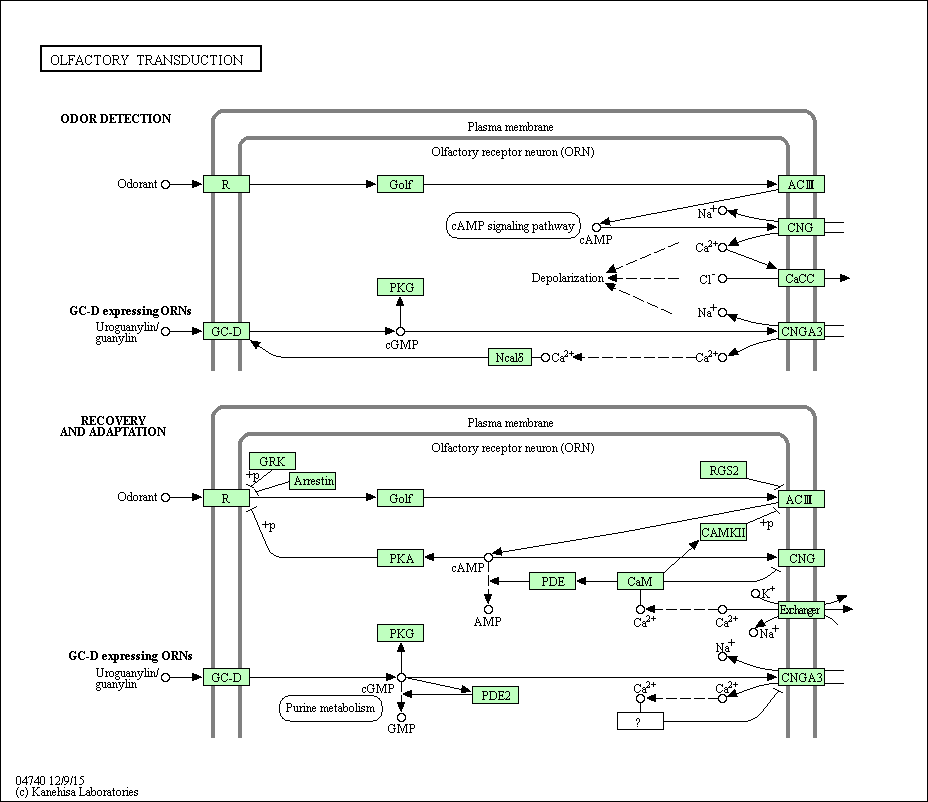

In [78]:
Image(kegg_get("mmu04740", "image").read())

In [79]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

### Subtask 3.2: Define a a suitable binary color scheme respresenting the fact whether a gene is significantly expressed or not

hint: 

http://www.rapidtables.com/web/color/RGB_Color.htm

In [80]:
# red (#FF0000) if gene is diff. expressed

### Subtask 3.3: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.2 ( you may need to define a suitable mapping from single genes to what is actually shown in the pathway map...)

In [81]:
# list storing the differentially expressed genes
fold_change_filtered.index

Index([u'Plekhg5', u'Nampt', u'Man2a2', u'Shank3', u'Shank2', u'Shank1',
       u'Syt1', u'Pmvk', u'Abcb1a', u'Klc3',
       ...
       u'Bmp2', u'Rxrg', u'Rxra', u'Ddx20', u'Chst1', u'Chst3', u'Chst2',
       u'Chst5', u'Chst4', u'Chst7'],
      dtype='object', name=u'gene', length=7112)

In [82]:
# get the pathway mmu04740
pathway = KGML_parser.read(kegg_get("mmu04740", "kgml"))
canvas = KGMLCanvas(pathway, import_imagemap=True)

# iterate over each gene in the pathway
for gene in pathway.genes:
    
    # by default gene is not diff. expr.
    is_gene_diff_expr = False
    
    # get the list of all kegg ids for the given gene
    list_of_all_kegg_ids_for_gene = gene.name.split()
    
    # get gene name for the kegg_id
    for kegg_id_ in list_of_all_kegg_ids_for_gene:
        
        # get list of all gene names for the given kegg id
        gene_names = kegg_get(kegg_id_).read().replace("DEFINITION", "NAME").split("NAME")[1].strip().split(",")
        
        # iterate over each gene_name
        for gene_name in gene_names:
            
            # check if gene is diff. expressed
            if gene_name in fold_change_filtered.index:
                
                # if gene is significant
                if fold_change_filtered.loc[gene_name]['holm-sidak'] < 0.05:
                    is_gene_diff_expr = True
                    
                    # change color
                    for graphic in gene.graphics:
                        graphic.bgcolor = '#FF0000'
                break
        
        # break for faster runtime
        if is_gene_diff_expr:
            break


In [83]:
# create a new figure and draw the pathway
canvas.draw("figures/test_new_colors.pdf")
PDF("figures/test_new_colors.pdf")

### Subtask 3.4: Define a suitable continuous color range representing the log2 fold changes of the all the genes in your data

hint:

http://bsou.io/posts/color-gradients-with-python

In [84]:
# done in 3.5

### Subtask 3.5: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.4

In [85]:
def RGB_to_hex(RGB):
    ''' [255,255,255] -> "#FFFFFF" 
        
        RGB: rgb values to convert to hex
    '''
    # Components need to be integers for hex to make sense
    RGB = [int(x) for x in RGB]
    return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])

In [86]:
fc_df_gene_index['log2 fold change'].describe()['min']

-0.40764013647200004

In [87]:
fc_df_gene_index['log2 fold change'].describe()['max']-fc_df_gene_index['log2 fold change'].describe()['min']

0.64631521217800003

In [88]:
    
    # get the pathway and the canvas of the pathway
    pathway = KGML_parser.read(kegg_get("mmu04740", "kgml"))
    canvas = KGMLCanvas(pathway, import_imagemap=True)

    # get the min and max fold change (to normalize the data)
    min_fold_change = fc_df_gene_index['log2 fold change'].describe()['min']
    max_fold_change = fc_df_gene_index['log2 fold change'].describe()['max']
    
    # iterate over each gene in the pathway
    for gene in pathway.genes:
    
        # gene is not diff. expr. by default
        is_gene_diff_expr = False
        
        # get the list of all kegg ids for the given gene
        list_of_all_kegg_ids_for_gene = gene.name.split()
    
        # get all gene names for the kegg_id
        for kegg_id_ in list_of_all_kegg_ids_for_gene:
        
            # get list of all gene names for the given kegg id
            gene_names = kegg_get(kegg_id_).read().replace("DEFINITION", "NAME").split("NAME")[1].strip().split(",")
        
            # iterate over each gene_name
            for gene_name in gene_names:
            
                # check if gene is in dataframe 
                if gene_name in fc_df_gene_index.index:
                    
                    # get the log_2_fold_change
                    log_2_fold_change = fc_df_gene_index.loc[gene_name]['log2 fold change']
                    
                    # map log_2_fold_change to [0,1], min_fold_change is negativ (-> subtract with one wants to add it)
                    log_2_fold_change = (log_2_fold_change -min_fold_change) / (max_fold_change-min_fold_change)
                                  
                    # seaborn color map
                    #color_map = plt.get_cmap('spectral')
                    color_map = plt.get_cmap('RdYlGn')
                    
                    # get the rbg color from the color map
                    rbg_color = color_map(log_2_fold_change)
                    
                    # get the hex value for the color
                    hex_value = rgb_to_hex(rbg_color)
                    
                    # gene is diff. expr
                    is_gene_diff_expr = True
                    
                    # recolor the gene with the corresponding color
                    for graphic in gene.graphics:
                        graphic.bgcolor = hex_value
                    
                    # value has been found
                    break
        
            # break for faster runtime
            if is_gene_diff_expr:
                break
            
    # create the pdf and draw it        
    canvas.draw("figures/fold_change.pdf")
    PDF("figures/fold_change.pdf")        
       